In [2]:
from astropy.io import fits
import numpy as np
from numpy import array, newaxis
HD163296_13CO_file = "/Users/mengfeilong/desktop/HD163296_13CO.image.fits"

HD163296_13COcube = fits.open(HD163296_13CO_file)[0]

header = HD163296_13COcube.header
print(header)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  432                                                  NAXIS2  =                  432                                                  NAXIS3  =                  110                                                  NAXIS4  =                    1                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   1.992911928230E-04                                                  BMIN    =   1.596954133775E-04                                                  BPA     =   7.212832641602E+01                                                  BTYPE   = 'Intensity'                   

In [55]:
import numpy as np
from numpy import array, newaxis
from astropy import units as u

print("Reference frequency:",header['CRVAL3'] * u.Hz)
print("Reference frequency channel:",header['CRPIX3'])
print("Frequency spacing:",header['CDELT3'] * u.Hz)
print("Number of different frequencies:",header['NAXIS3'])
print("Unit of frequency:",header['CUNIT3'])
print(header['RESTFRQ'])

FrequencySpacing = header['CDELT3'] * u.Hz
ReferenceFrequency = header['CRVAL3'] * u.Hz
NumFreq = np.arange(start=1, stop=111, step=1)
RestFreq = header['RESTFRQ'] * u.Hz
c = 299792.458 * u.km / u.s

def FrequenciesOnDifferentChannals(FrequencySpacing, ReferenceFrequency, NumFreq):
    Freq = ReferenceFrequency + (NumFreq - 1) * FrequencySpacing
    return Freq

ResultReferenceFreq = FrequenciesOnDifferentChannals(FrequencySpacing, ReferenceFrequency, Numfreq)

print(ResultReferenceFreq)

def ConvertingUnits(ResultReferenceFreq, RestFreq):
    ConvertingUnits = c * (RestFreq - ResultReferenceFreq) / RestFreq
    return ConvertingUnits

resulrtVelocity = ConvertingUnits(ResultReferenceFreq, RestFreq)
print(resulrtVelocity)

Reference frequency: 220400864918.7 Hz
Reference frequency channel: 1.0
Frequency spacing: -244126.1094971 Hz
Number of different frequencies: 110
Unit of frequency: Hz
220398680000.0
[2.20400865e+11 2.20400621e+11 2.20400377e+11 2.20400133e+11
 2.20399888e+11 2.20399644e+11 2.20399400e+11 2.20399156e+11
 2.20398912e+11 2.20398668e+11 2.20398424e+11 2.20398180e+11
 2.20397935e+11 2.20397691e+11 2.20397447e+11 2.20397203e+11
 2.20396959e+11 2.20396715e+11 2.20396471e+11 2.20396227e+11
 2.20395982e+11 2.20395738e+11 2.20395494e+11 2.20395250e+11
 2.20395006e+11 2.20394762e+11 2.20394518e+11 2.20394274e+11
 2.20394029e+11 2.20393785e+11 2.20393541e+11 2.20393297e+11
 2.20393053e+11 2.20392809e+11 2.20392565e+11 2.20392321e+11
 2.20392076e+11 2.20391832e+11 2.20391588e+11 2.20391344e+11
 2.20391100e+11 2.20390856e+11 2.20390612e+11 2.20390367e+11
 2.20390123e+11 2.20389879e+11 2.20389635e+11 2.20389391e+11
 2.20389147e+11 2.20388903e+11 2.20388659e+11 2.20388414e+11
 2.20388170e+11 2.20387

186.94332492239698


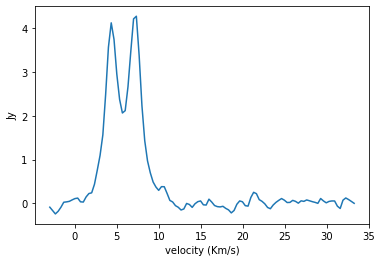

In [149]:
import matplotlib.pyplot as plt
import math

data = HD163296_13COcube.data
data = np.squeeze(data)
spectrum = np.sum(data, axis=(1,2))

numchannels = header['NAXIS3']

Bmaj = header['BMAJ'] * u.deg
Bmin = header['BMIN'] * u.deg

area = (math.pi * Bmaj * Bmin) / (4 * np.log(2))
sizePix = header['CDELT2'] * header['CDELT2'] * u.deg * u.deg
numPix = area / sizePix
spectrum = spectrum / numPix

plt.plot(resulrtVelocity, spectrum)
plt.xlabel('velocity (Km/s)')
plt.ylabel('Jy')
print(numPix)